# **Email Spam Detection Using Machine Learning**

Author - **Naman Sahu**

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
%matplotlib inline
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix , recall_score , precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
df = pd.read_csv('/content/drive/MyDrive/data/Oasis Infobyte/spam.csv' ,encoding="latin_1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [50]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [51]:
#Droping unwanted columns

df1 = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1)
df1.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [52]:
df1.shape

(5572, 2)

In [53]:
df1.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [55]:
df1.isnull().sum()

v1    0
v2    0
dtype: int64

In [56]:
df.groupby('v1').describe()

v2                                                                 \
     count unique                                                top freq   
v1                                                                          
ham   4825   4516                             Sorry, I'll call later   30   
spam   747    653  Please call our customer service representativ...    4   

     Unnamed: 2                                                            \
          count unique                                                top   
v1                                                                          
ham          45     39   bt not his girlfrnd... G o o d n i g h t . . .@"   
spam          5      4                                        PO Box 5249   

          Unnamed: 3                                    Unnamed: 4         \
     freq      count unique                    top freq      count unique   
v1                                                                          
ham     3         10      9                     GE    2          6      5   
spam    2          2      1   MK17 92H. 450Ppw 16"    2          0      0   

                    
          top freq  
v1                  
ham   GNT:-)"    2  
spam      NaN  NaN

In [57]:
df.groupby('v2').describe()

v1                   \
                                                   count unique  top freq   
v2                                                                          
 &lt;#&gt;  in mca. But not conform.                   1      1  ham    1   
 &lt;#&gt;  mins but i had to stop somewhere fi...     1      1  ham    1   
 &lt;DECIMAL&gt; m but its not a common car her...     1      1  ham    1   
 and  picking them up from various points              1      1  ham    1   
 came to look at the flat, seems ok, in his 50s...     1      1  ham    1   
...                                                  ...    ...  ...  ...   
ÌÏ still got lessons?  ÌÏ in sch?                      1      1  ham    1   
ÌÏ takin linear algebra today?                         1      1  ham    1   
ÌÏ thk of wat to eat tonight.                          1      1  ham    1   
ÌÏ v ma fan...                                         1      1  ham    1   
ÌÏ wait 4 me in sch i finish ard 5..                   1      1  ham    1   

                                                   Unnamed: 2              \
                                                        count unique  top   
v2                                                                          
 &lt;#&gt;  in mca. But not conform.                        0      0  NaN   
 &lt;#&gt;  mins but i had to stop somewhere fi...          0      0  NaN   
 &lt;DECIMAL&gt; m but its not a common car her...          0      0  NaN   
 and  picking them up from various points                   0      0  NaN   
 came to look at the flat, seems ok, in his 50s...          0      0  NaN   
...                                                       ...    ...  ...   
ÌÏ still got lessons?  ÌÏ in sch?                           0      0  NaN   
ÌÏ takin linear algebra today?                              0      0  NaN   
ÌÏ thk of wat to eat tonight.                               0      0  NaN   
ÌÏ v ma fan...                                              0      0  NaN   
ÌÏ wait 4 me in sch i finish ard 5..                        0      0  NaN   

                                                        Unnamed: 3         \
                                                   freq      count unique   
v2                                                                          
 &lt;#&gt;  in mca. But not conform.                NaN          0      0   
 &lt;#&gt;  mins but i had to stop somewhere fi...  NaN          0      0   
 &lt;DECIMAL&gt; m but its not a common car her...  NaN          0      0   
 and  picking them up from various points           NaN          0      0   
 came to look at the flat, seems ok, in his 50s...  NaN          0      0   
...                                                 ...        ...    ...   
ÌÏ still got lessons?  ÌÏ in sch?                   NaN          0      0   
ÌÏ takin linear algebra today?                      NaN          0      0   
ÌÏ thk of wat to eat tonight.                       NaN          0      0   
ÌÏ v ma fan...                                      NaN          0      0   
ÌÏ wait 4 me in sch i finish ard 5..                NaN          0      0   

                                                             Unnamed: 4  \
                                                    top freq      count   
v2                                                                        
 &lt;#&gt;  in mca. But not conform.                NaN  NaN          0   
 &lt;#&gt;  mins but i had to stop somewhere fi...  NaN  NaN          0   
 &lt;DECIMAL&gt; m but its not a common car her...  NaN  NaN          0   
 and  picking them up from various points           NaN  NaN          0   
 came to look at the flat, seems ok, in his 50s...  NaN  NaN          0   
...                                                 ...  ...        ...   
ÌÏ still got lessons?  ÌÏ in sch?                   NaN  NaN          0   
ÌÏ takin linear algebra today?                      NaN  NaN       

In [58]:
#Renaming the columns to be understandable
df1.rename(columns={'v1':'Target','v2':'Email'},inplace=True)
df1.head()

,Target,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [59]:
df1.Target.value_counts()

ham     4825
spam     747
Name: Target, dtype: int64

In [60]:
df1.Email.value_counts()

Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                      

In [61]:
df1['Email length'] = df1['Email'].apply(len)
df1.head()

,Target,Email,Email length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


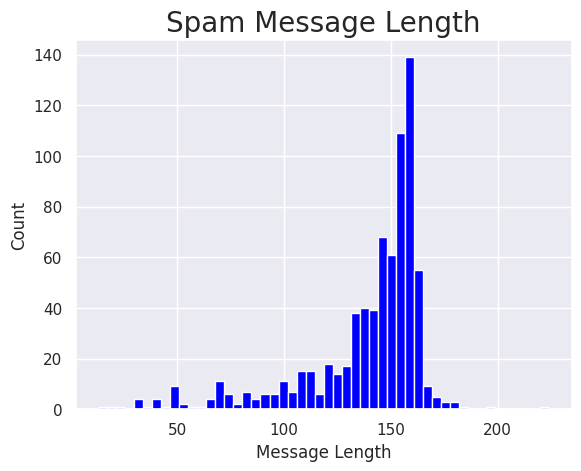

In [62]:
plt.hist(df1[df1['Target']=='spam']['Email length'],color='blue',bins=50)
plt.title('Spam Message Length',fontsize=20)
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()

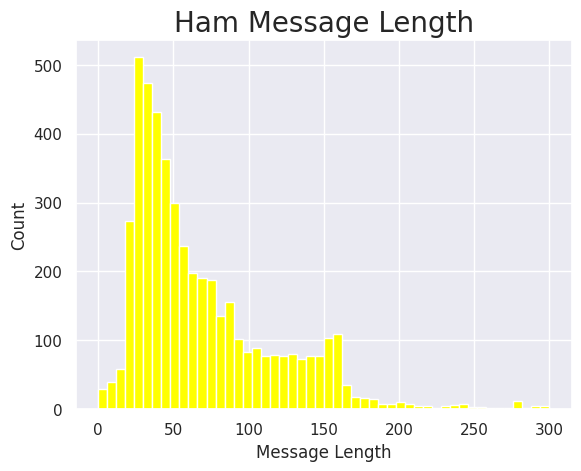

In [63]:
plt.hist(df1[df1['Target']=='ham']['Email length'],color='yellow',bins=50,range=(0,300))
plt.title('Ham Message Length',fontsize=20)
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()

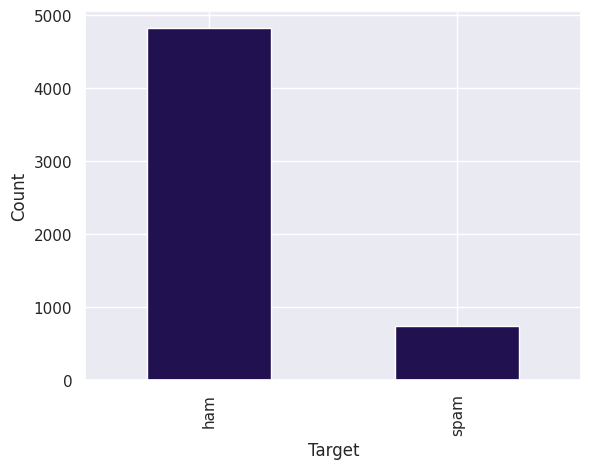

In [64]:
#Setting a color palette
palette = sns.color_palette("magma")
sns.set(palette = palette)

#Plotting Spam vs not spam(ham) value count
df1['Target'].value_counts().plot(kind='bar')
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

# Text Processing

In [65]:
import string
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def process_sms(sms):
    ''' This function removes punctuations and returns the sms as a list of words'''
    sms = sms.translate(str.maketrans('','',string.punctuation)) #remove punctuations
    sms = sms.split()
    sms = [ps.stem(word) for word in sms if len(word) > 2]
    sms = ' '.join(sms)
    return sms

In [66]:
df1['Email'] = df1.Email.apply(process_sms)

df1['Target'] = df1.Target.map({'ham':0, 'spam':1})
df1.head()

,Target,Email,Email length
0,0,until jurong point crazi avail onli bugi great...,111
1,0,lar joke wif oni,29
2,1,free entri wkli comp win cup final tkt 21st ma...,155
3,0,dun say earli hor alreadi then say,49
4,0,nah dont think goe usf live around here though,61


In [67]:
df1= df1[df1.columns.drop(list(df1.filter(regex='Unnamed')))]
df1.head()

,Target,Email,Email length
0,0,until jurong point crazi avail onli bugi great...,111
1,0,lar joke wif oni,29
2,1,free entri wkli comp win cup final tkt 21st ma...,155
3,0,dun say earli hor alreadi then say,49
4,0,nah dont think goe usf live around here though,61


In [68]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(df1["Email"],df1["Target"],test_size = 0.2, random_state = 0)
x_train.head()


1114         nothi kalli home groundamla home town durban
3589          escap theatr now go watch kavalan few minut
3095    walk from mom right stagwood pass right winter...
1012                       dunno they close oredi not fan
3320                                           right work
Name: Email, dtype: object

In [69]:
#Funtion to build and visualise a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title, accuracy_title):
    cm=confusion_matrix(y_test, y_pred)
    print(f'{accuracy_title} Accuracy Score:', '{:.2%}'.format(accuracy_score(y_valid, y_pred)))
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='magma')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

In [70]:
x_train.isnull().any()

False

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string if there are nans
#dataset['description'] = dataset['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix_train = tfidf.fit_transform(x_train)
tfidf_matrix_valid= tfidf.transform(x_valid)

tfidf_matrix_train.shape

(4457, 6682)

# Training the Model

# **Logistic Regression**

Logistic Regression Accuracy Score: 95.25%
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       949
           1       0.97      0.70      0.81       166

    accuracy                           0.95      1115
   macro avg       0.96      0.85      0.89      1115
weighted avg       0.95      0.95      0.95      1115



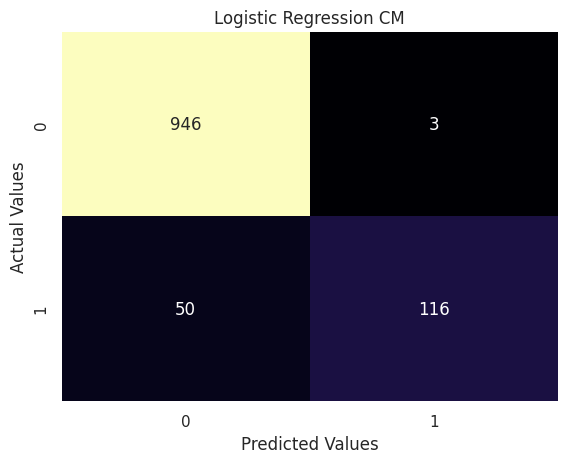

array([[946,   3],
       [ 50, 116]])

In [72]:
from sklearn.linear_model import LogisticRegression
log_reg_classifier = LogisticRegression(solver= 'liblinear')
log_reg_classifier.fit(tfidf_matrix_train, y_train)
y_pred_log = log_reg_classifier.predict(tfidf_matrix_valid)
my_confusion_matrix(y_valid, y_pred_log, 'Logistic Regression CM', 'Logistic Regression')

# **Random Forest Classifier**

Random Forest Accuracy Score: 96.86%
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       949
           1       0.99      0.80      0.88       166

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



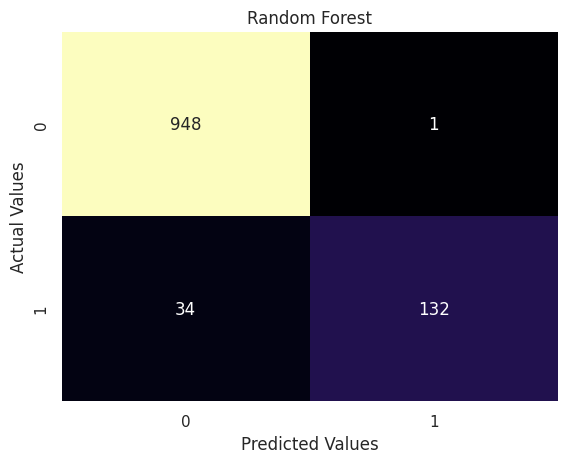

[[948   1]
 [ 34 132]]


In [73]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(tfidf_matrix_train, y_train)
y_pred_rfc=rfc.predict(tfidf_matrix_valid)
print(my_confusion_matrix(y_valid, y_pred_rfc, 'Random Forest', 'Random Forest'))

# **Thanks**